# <u>Spotify Tracks Dataset</u>
## Author: Giulia Sonsino (4647227)

* Importing libraries and loading dataset
* Column Description
* Data Cleaning
* Data Analysis
* Popularity Prediction
* Recommendation System

## --- IMPORTING LIBRARIES AND LOADING DATASET ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, mean_absolute_error, accuracy_score, roc_auc_score, f1_score, recall_score
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
spotify = pd.read_csv('dataset.csv', index_col=0)

In [2]:
spotify.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [3]:
print("Original Spotify Dataset, before cleaning, has {} rows and {} columns".format(spotify.shape[0],spotify.shape[1]))

Original Spotify Dataset, before cleaning, has 114000 rows and 20 columns


## --- COLUMNS DESCRIPTION ---

In [4]:
# Define the columns and their descriptions
columns = ['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 
           'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

descriptions = [
    'The Spotify ID for the track', 
    'The artists who performed the track', 
    'The album name in which the track appears', 
    'Name of the track', 
    'The popularity of a track (0-100)', 
    'Track length in milliseconds', 
    'Whether the track has explicit lyrics (True/False)', 
    'Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity (0.0-1.0)', 
    'Energy represents a perceptual measure of intensity and activity (0.0-1.0)', 
    'The key the track is in (0=C, 1=C♯/D♭, etc.)', 
    'The overall loudness of the track (in decibels)', 
    'Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived (1=major, 0=minor)', 
    'Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks (0.0-1.0)', 
    'Acousticness score (0.0-1.0)', 
    'Instrumentalness score. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content (0.0-1.0)', 
    'Liveness detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live (0.0-1.0)', 
    'Valence is a measure describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry) (0.0-1.0)', 
    'The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration(in beats per minute)', 
    'Time signature is a notational convention to specify how many beats are in each bar (or measure) (3/4 to 7/4)', 
    'The genre to which the track belongs'
]

# Create a DataFrame with column names and their descriptions
df_descriptions = pd.DataFrame({
    'Column Name': columns,
    'Description': descriptions
})

pd.set_option('display.max_colwidth', None)

df_descriptions

,Column Name,Description
0,track_id,The Spotify ID for the track
1,artists,The artists who performed the track
2,album_name,The album name in which the track appears
3,track_name,Name of the track
4,popularity,The popularity of a track (0-100)
5,duration_ms,Track length in milliseconds
6,explicit,Whether the track has explicit lyrics (True/False)
7,danceability,"Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity (0.0-1.0)"
8,energy,Energy represents a perceptual measure of intensity and activity (0.0-1.0)
9,key,"The key the track is in (0=C, 1=C♯/D♭, etc.)"


## --- DATA CLEANING ---
### In this section, I clean the dataset by handling missing values, removing duplicates, and handling some columns.

In [5]:
# Checking for missing values and removing rows with them
print(spotify.isnull().sum())
spotify = spotify.dropna()

print(f"Shape before removing duplicates: {spotify.shape}")

# Removing duplicate tracks
#spotify = spotify.drop_duplicates(subset=['track_id'], keep='first')
spotify = spotify.drop_duplicates(subset=['track_name','artists'], keep='first')


print(f"Shape after removing duplicates: {spotify.shape}")

spotify['explicit'] = spotify['explicit'].astype(int)

label_encoder = LabelEncoder()
spotify['genre_encoded'] = label_encoder.fit_transform(spotify['track_genre'])
spotify['artists_encoded'] = label_encoder.fit_transform(spotify['artists'])

# Descriptive statistics of the numerical columns
spotify.describe()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
Shape before removing duplicates: (113999, 20)
Shape after removing duplicates: (81343, 20)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_encoded,artists_encoded
count,81343.000000,8.134300e+04,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000
mean,34.636392,2.314145e+05,0.085539,0.559276,0.635025,5.285900,-8.593930,0.632347,0.088993,0.329666,0.184733,0.219723,0.463277,122.144834,3.896967,53.064345,15814.581046
std,19.438517,1.164924e+05,0.279684,0.177747,0.258641,3.557629,5.304797,0.482169,0.116629,0.339961,0.331592,0.198272,0.263383,30.129012,0.456398,33.332998,9058.944617
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738710e+05,0.000000,0.446000,0.455000,2.000000,-10.451500,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000,4.000000,24.000000,8166.000000
50%,35.000000,2.152050e+05,0.000000,0.573000,0.678000,5.000000,-7.262000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000,4.000000,50.000000,15760.000000
75%,49.000000,2.673460e+05,0.000000,0.690000,0.857000,8.000000,-5.140000,1.000000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128500,4.000000,81.000000,23604.500000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,112.000000,31436.000000


In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81343 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          81343 non-null  object 
 1   artists           81343 non-null  object 
 2   album_name        81343 non-null  object 
 3   track_name        81343 non-null  object 
 4   popularity        81343 non-null  int64  
 5   duration_ms       81343 non-null  int64  
 6   explicit          81343 non-null  int64  
 7   danceability      81343 non-null  float64
 8   energy            81343 non-null  float64
 9   key               81343 non-null  int64  
 10  loudness          81343 non-null  float64
 11  mode              81343 non-null  int64  
 12  speechiness       81343 non-null  float64
 13  acousticness      81343 non-null  float64
 14  instrumentalness  81343 non-null  float64
 15  liveness          81343 non-null  float64
 16  valence           81343 non-null  float64
 1

## Outlier Detection and Removal (duration of tracks)
####  I define a function to detect and remove outliers based on the duration of the tracks. The outliers are identified using the Interquartile Range (IQR) method. Tracks with a duration significantly lower or higher than the normal range are considered outliers and removed from the dataset.

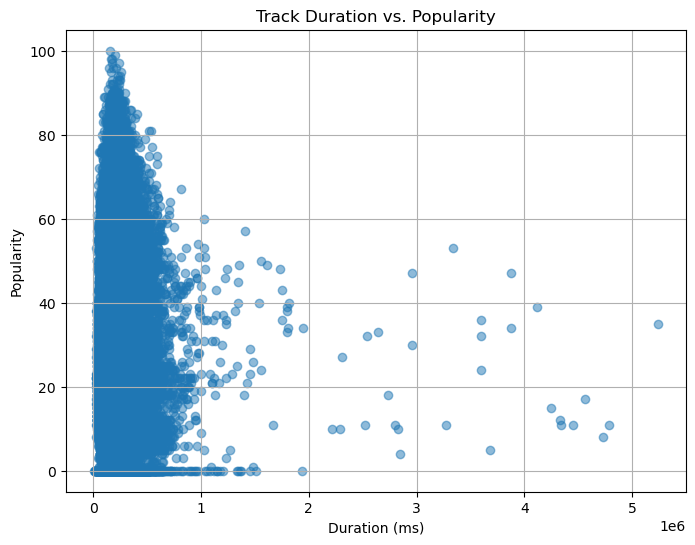

-----Before removing outliers-----
Top 3 Longest Tracks (in minutes):



,track_name,artists,duration_min
73617,Unity (Voyage Mix) Pt. 1,Tale Of Us,87.29
10935,Crossing Wires 002 - Continuous DJ Mix,Timo Maas,79.82
24348,The Lab 03 - Continuous DJ Mix Part 1,Seth Troxler,78.84


Top 3 Shortest Tracks (in minutes):



,track_name,artists,duration_min
59310,The Exorsism Begins...,Leila Bela,0.14
59812,V-4,Leila Bela,0.22
59775,Screams for a Finale! (feat. Leila's Opera Class),Leila Bela;Leila's Opera Class,0.26


In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(spotify['duration_ms'], spotify['popularity'], alpha=0.5)
plt.title('Track Duration vs. Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid()
plt.show()

# function to convert milliseconds in minutes
def ms_to_minutes(ms):
    return round(ms / 60000, 2)

print("-----Before removing outliers-----")

longest_tracks = spotify.sort_values(by='duration_ms', ascending=False).head(3)
shortest_tracks = spotify.sort_values(by='duration_ms', ascending=True).head(3)
longest_tracks['duration_min'] = longest_tracks['duration_ms'].apply(ms_to_minutes)
shortest_tracks['duration_min'] = shortest_tracks['duration_ms'].apply(ms_to_minutes)

columns_to_display = ['track_name', 'artists', 'duration_min']
table_to_display_longest = longest_tracks[columns_to_display]
table_to_display_shortest = shortest_tracks[columns_to_display]

print("Top 3 Longest Tracks (in minutes):\n")
display(table_to_display_longest)
print("Top 3 Shortest Tracks (in minutes):\n")
display(table_to_display_shortest)

In [8]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, 0) 
    upper_bound = Q3 + 1.5 * IQR
    print(f"Lower bound for {ft}: {lower_bound}, Upper bound: {upper_bound}") 
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls   

index_list = []
for feature in ['duration_ms']:
    index_list.extend(outliers(spotify, feature))
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

index_list = outliers(spotify, 'duration_ms')

original_len = len(spotify)
cleaned_df = remove(spotify, index_list)
cleaned_len = len(cleaned_df)
rows_removed = original_len - cleaned_len
print(f'Number of eliminated rows: {rows_removed}')
spotify= cleaned_df

Lower bound for duration_ms: 33658.5, Upper bound: 407558.5
Lower bound for duration_ms: 33658.5, Upper bound: 407558.5
Number of eliminated rows: 3784


In [9]:
print("-----After removing outliers-----")

longest_tracks = spotify.sort_values(by='duration_ms', ascending=False).head(3)
shortest_tracks = spotify.sort_values(by='duration_ms', ascending=True).head(3)
longest_tracks['duration_min'] = longest_tracks['duration_ms'].apply(ms_to_minutes)
shortest_tracks['duration_min'] = shortest_tracks['duration_ms'].apply(ms_to_minutes)

columns_to_display = ['track_name', 'artists', 'duration_min']
table_to_display_longest = longest_tracks[columns_to_display]
table_to_display_shortest = shortest_tracks[columns_to_display]

print("Top 3 Longest Tracks (in minutes):\n")
display(table_to_display_longest)
print("Top 3 Shortest Tracks (in minutes):\n")
display(table_to_display_shortest)

-----After removing outliers-----
Top 3 Longest Tracks (in minutes):



,track_name,artists,duration_min
18842,The Biggest Ball of Twine In Minnesota,"""Weird Al"" Yankovic",6.79
23249,Like a Wirsing - Hanne & Lore Remix,andhim;Hanne & Lore,6.79
8371,Poulo,Amadou & Mariam,6.79


Top 3 Shortest Tracks (in minutes):



,track_name,artists,duration_min
83274,"A State Of Trance (ASOT 1090) - Track Recap, Pt. 1",Armin van Buuren,0.56
76525,"Carmen, Act II: No.15 bis Récit : Mais qui donc attends-tu? (Le Dancaïro/Carmen/Le Remendado)",Georges Bizet;Nicolas Rivenq;Michel Plasson;Wolff;Orchestre National Du Capitole De Toulouse,0.56
14899,Yesus Didalam Rumahku,Maranatha! Kids,0.56


## Outlier Detection and Removal (popularity)

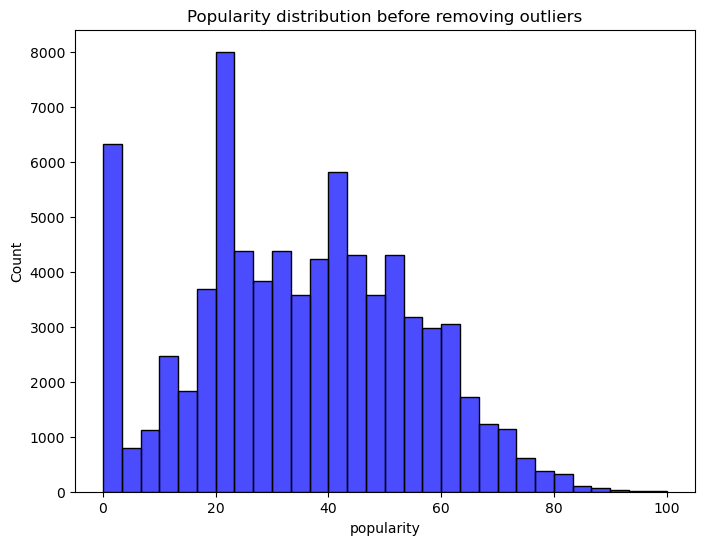

Lower Bound: 10.5
Upper Bound: 133.0
Number of deleted rows: 8824


In [10]:
plt.figure(figsize=(8,6))
sns.histplot(cleaned_df['popularity'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Popularity distribution before removing outliers')
plt.show()
#removing outliers
Q1 = spotify['popularity'].quantile(0.25)
Q3 = spotify['popularity'].quantile(0.75)
IQR = Q3 - Q1

multiplier = 3
lower_bound = max(Q1 - multiplier * IQR, Q1 * 0.5)
upper_bound = Q3 + multiplier * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


df_no_outliers = spotify[(spotify['popularity'] >= lower_bound) & (spotify['popularity'] <= upper_bound)]

#number of removed rows
removed_rows = len(spotify) - len(df_no_outliers)
print(f"Number of deleted rows: {removed_rows}")

spotify= df_no_outliers

## Define a function to classify speechiness into categories

In [11]:
def count_speechiness_groups(df):
    speech_count = df[df['speechiness'] > 0.66].shape[0]
    mixed_count = df[(df['speechiness'] > 0.33) & (df['speechiness'] <= 0.66)].shape[0]
    music_count = df[df['speechiness'] <= 0.33].shape[0]

    print(f'Tracks with speechiness > 0.66 (Speech): {speech_count}')
    print(f'Tracks with 0.33 < speechiness <= 0.66 (Mixed): {mixed_count}')
    print(f'Tracks with speechiness <= 0.33 (Music): {music_count}')

count_speechiness_groups(spotify)


Tracks with speechiness > 0.66 (Speech): 769
Tracks with 0.33 < speechiness <= 0.66 (Mixed): 1933
Tracks with speechiness <= 0.33 (Music): 66033


In [12]:
# Define a function to classify speechiness into categories
 
def classify_speechiness(speechiness_value):
    if speechiness_value > 0.66:
        return 'Speech'
    elif speechiness_value > 0.33:
        return 'Mixed'
    else:
        return 'Music'

# Apply the function to modify the existing 'speechiness' column
spotify['speechiness_group'] = spotify['speechiness'].apply(classify_speechiness)

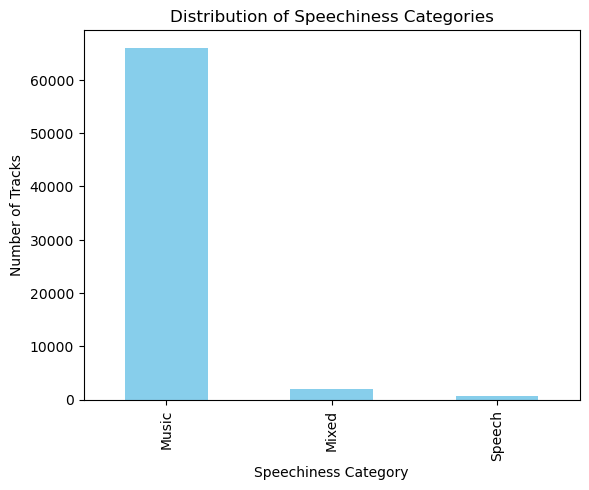

In [13]:
# Plot the distribution of speechiness categories
speechiness_counts = spotify['speechiness_group'].value_counts()
speechiness_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Speechiness Categories')
plt.xlabel('Speechiness Category')
plt.ylabel('Number of Tracks')
plt.show()


## --- DATA ANALYSIS ---

#### Popularity distribution after removing outliers

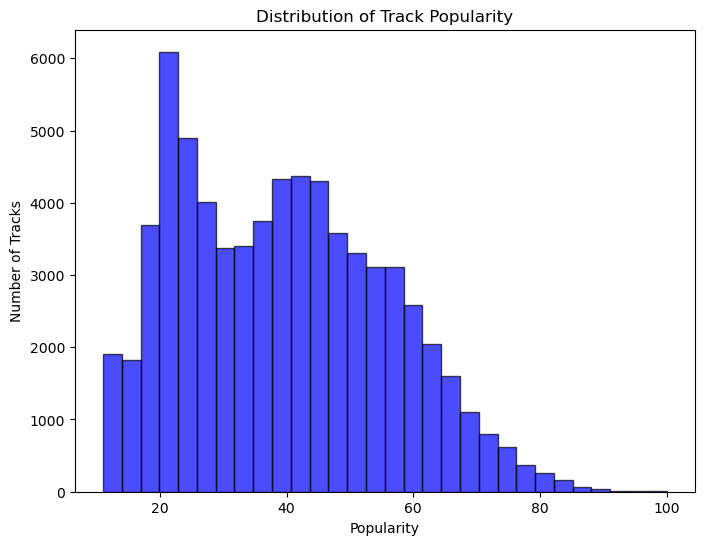

In [14]:
plt.figure(figsize=(8,6))
plt.hist(spotify['popularity'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()

#### Calculate average popularity by genre and create a bar chart of average popularity by genre

In [15]:
genre_popularity = spotify.groupby('track_genre')['popularity'].mean().reset_index()
#Sort genres by average popularity in descending order
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)
print(genre_popularity.head(10))

     track_genre  popularity
20         dance   77.037815
90          rock   76.565217
80           pop   71.679654
67         latin   69.638554
31       electro   67.252874
3    alternative   66.633333
51       hip-hop   64.818182
102         soul   64.182857
53         house   64.020408
30           edm   62.791878


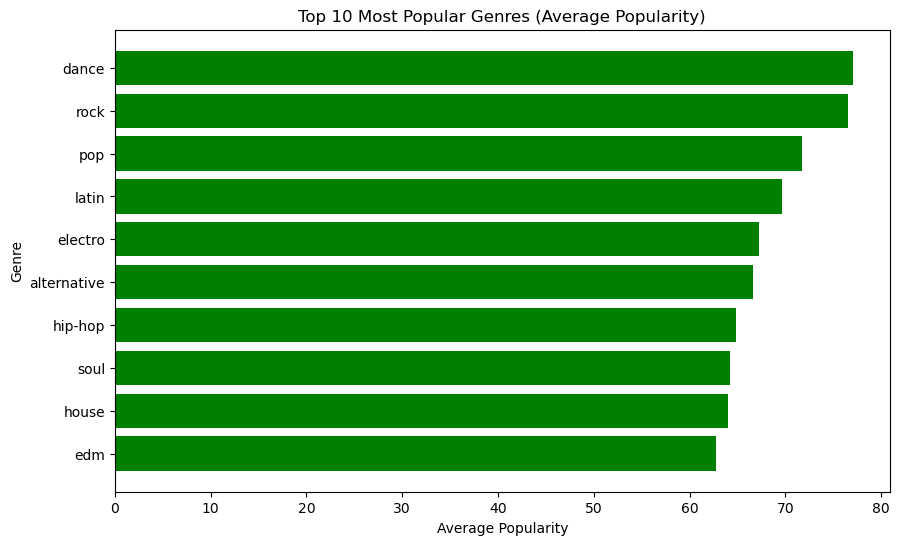

In [16]:
plt.figure(figsize=(10,6))
plt.barh(genre_popularity['track_genre'].head(10), genre_popularity['popularity'].head(10), color='green')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.title('Top 10 Most Popular Genres (Average Popularity)')
plt.gca().invert_yaxis() 
plt.show()

#### Artists with the highest number of tracks

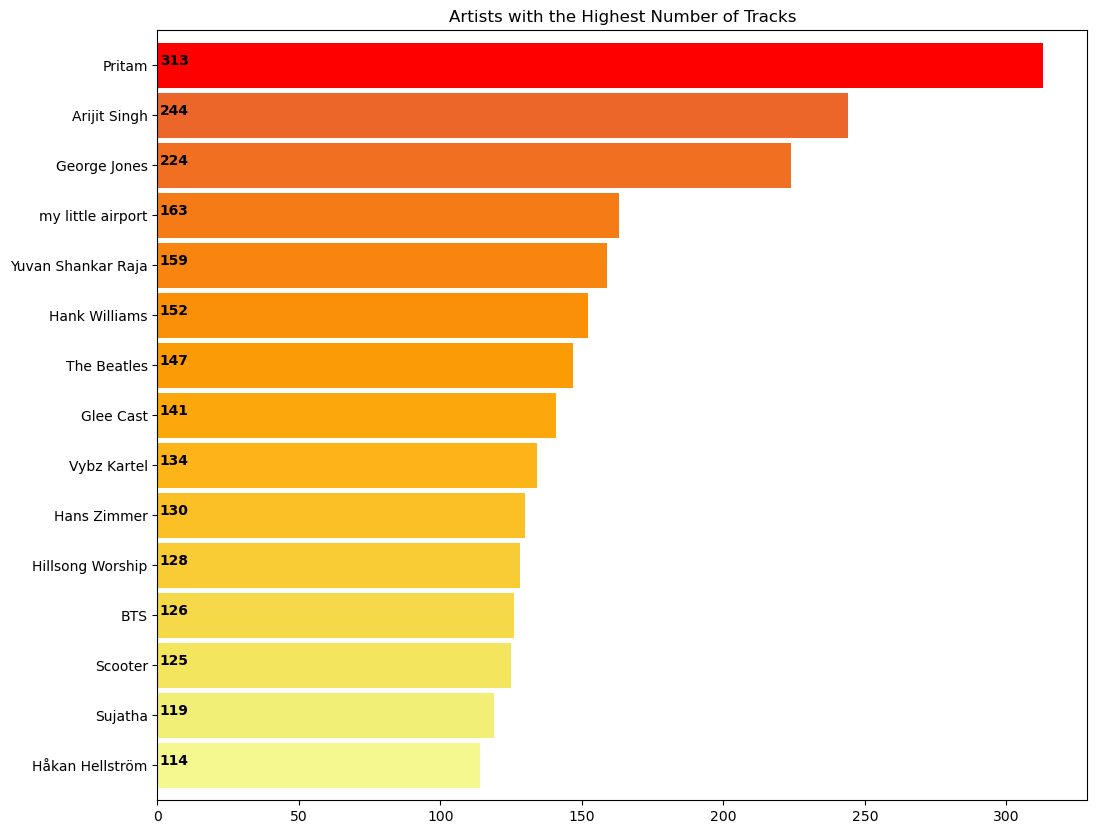

In [17]:
artists = []
for artist_list in spotify['artists']:
    if isinstance(artist_list, list):
        artists.extend(artist_list)
    elif isinstance(artist_list, str):
        artists.extend(artist_list.split(';'))
        
artists = list(filter(None, artists))

plt.subplots(figsize=(12,10))
ax = pd.Series(artists).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('inferno_r', 40))

# Labels with the number of occurrences
for i, v in enumerate(pd.Series(artists).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v, fontsize=10, color='black', weight='bold')

plt.title('Artists with the Highest Number of Tracks')
ax.patches[-1].set_facecolor('r')
plt.show()

#### Artists with the highest average popularity

<Figure size 1200x1000 with 0 Axes>

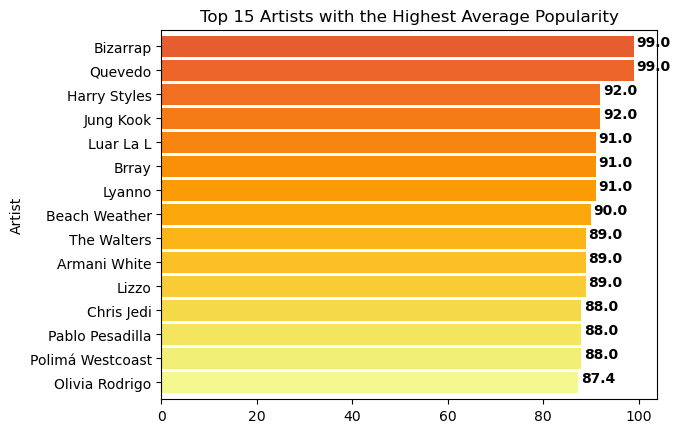

In [18]:
artist_popularity = {}

for index, row in spotify.iterrows():
    artist_list = row['artists']
    popularity = row['popularity']
    
    if isinstance(artist_list, list): 
        for artist in artist_list:
            if artist in artist_popularity:
                artist_popularity[artist]['total_popularity'] += popularity
                artist_popularity[artist]['track_count'] += 1
            else:
                artist_popularity[artist] = {'total_popularity': popularity, 'track_count': 1}
    elif isinstance(artist_list, str): 
        for artist in artist_list.split(';'):
            if artist in artist_popularity:
                artist_popularity[artist]['total_popularity'] += popularity
                artist_popularity[artist]['track_count'] += 1
            else:
                artist_popularity[artist] = {'total_popularity': popularity, 'track_count': 1}

# Calculate average popularity for each artist
artist_avg_popularity = {artist: data['total_popularity'] / data['track_count'] for artist, data in artist_popularity.items()}

artist_popularity_df = pd.DataFrame(list(artist_avg_popularity.items()), columns=['Artist', 'Avg_Popularity'])

artist_popularity_df = artist_popularity_df.sort_values(by='Avg_Popularity', ascending=False).head(15)

plt.figure(figsize=(12,10))
ax = artist_popularity_df.sort_values(by='Avg_Popularity', ascending=True).plot.barh(x='Artist', y='Avg_Popularity', width=0.9, color=sns.color_palette('inferno_r', 40), legend=False)

for i, v in enumerate(artist_popularity_df.sort_values(by='Avg_Popularity', ascending=True)['Avg_Popularity']):
    ax.text(v + 0.5, i, f'{v:.1f}', fontsize=10, color='black', weight='bold')

plt.title('Top 15 Artists with the Highest Average Popularity')

plt.show()

## --- POPULARITY PREDICTION ---

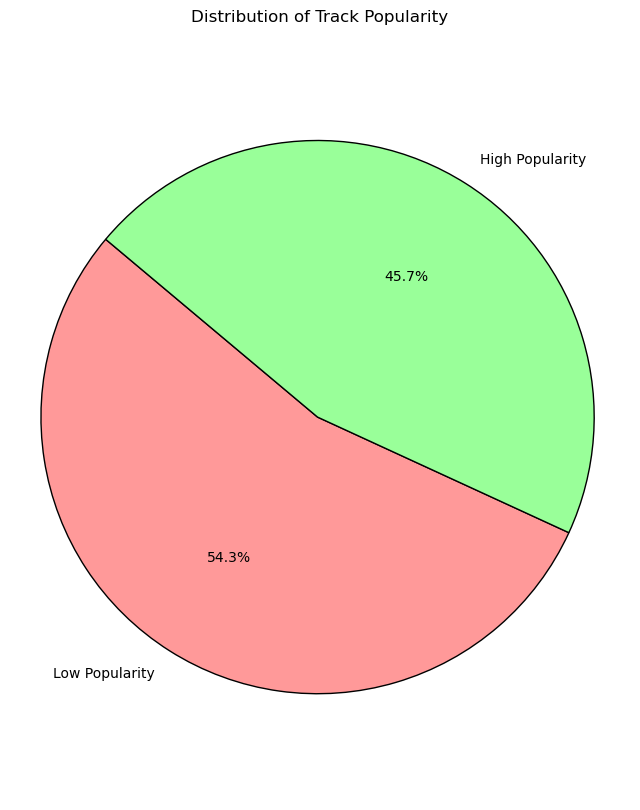

In [19]:
#define bins and labels for popularity grouping
bins = [0, 40, 100]  #ranges for each group
labels = ['0-40', '41-100']  # labels for the ranges

# Create a new column for the grouped popularity based on the defined bins
spotify['popularity_group'] = pd.cut(spotify['popularity'], bins=bins, labels=labels, right=True)

# Encode the categorical popularity groups into numeric labels
label_encoder = LabelEncoder()
spotify['popularity_group_encoded'] = label_encoder.fit_transform(spotify['popularity_group'])


# Count the number of tracks in each popularity group
popularity_counts = spotify['popularity_group'].value_counts().sort_index()
labels = ['Low Popularity', 'High Popularity']
colors = ['#FF9999', '#99FF99'] 
plt.figure(figsize=(8, 10))
plt.pie(popularity_counts, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Track Popularity')
plt.axis('equal')
plt.show()


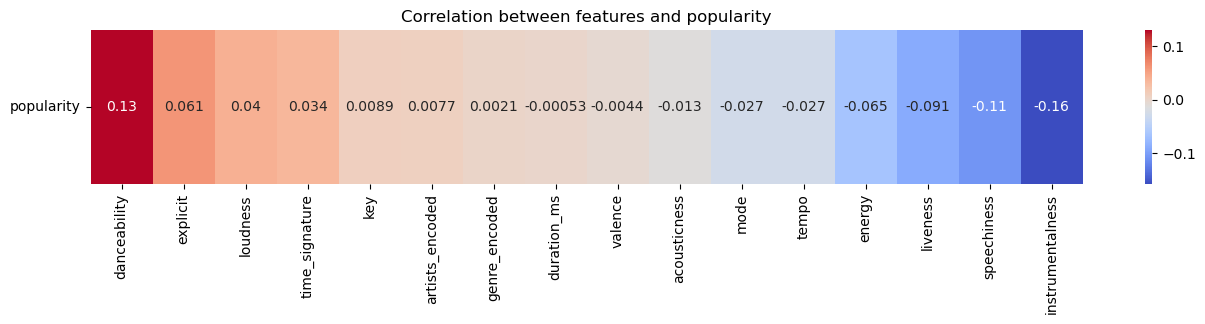

In [20]:
numerical_df = spotify.select_dtypes(include='number').columns
popularity_corr = spotify[numerical_df].corr()['popularity'].drop( ['popularity', 'popularity_group_encoded']).sort_values(ascending=False)
popularity_corr_df = popularity_corr.to_frame().T 

plt.figure(figsize=(16, 2))
sns.heatmap(popularity_corr_df, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation between features and popularity')
plt.yticks(rotation=0) 
plt.show()



                     Accuracy   ROC AUC  F1 Score    Recall
KNN                  0.636139  0.633878  0.603896  0.608134
Logistic Regression  0.605150  0.595749  0.530287  0.488676
Random Forest        0.778424  0.773536  0.747178  0.717863


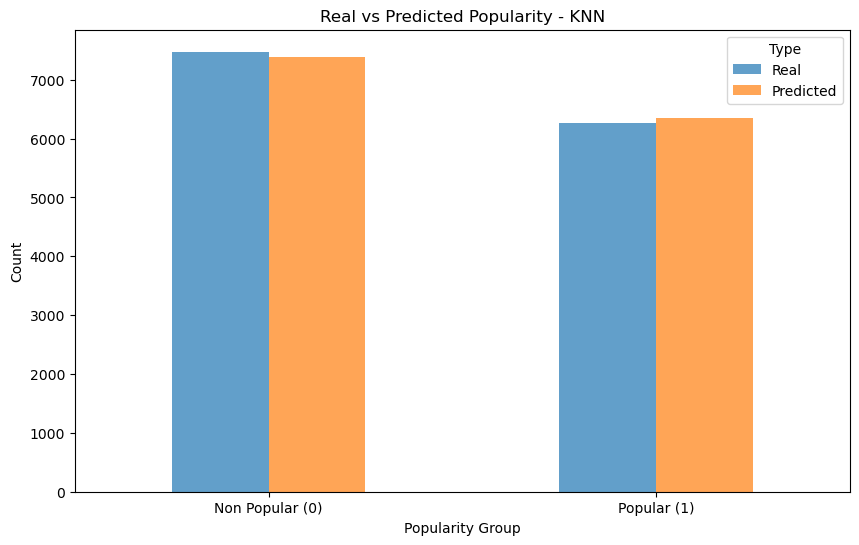

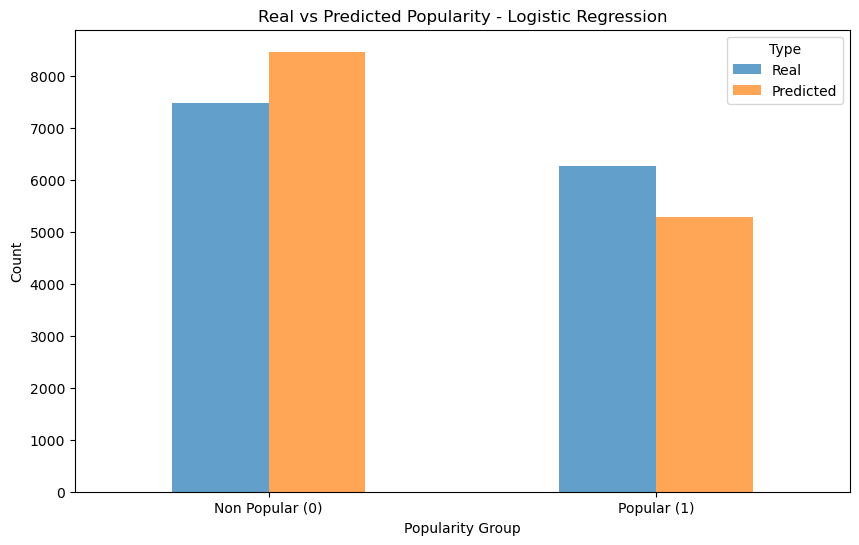

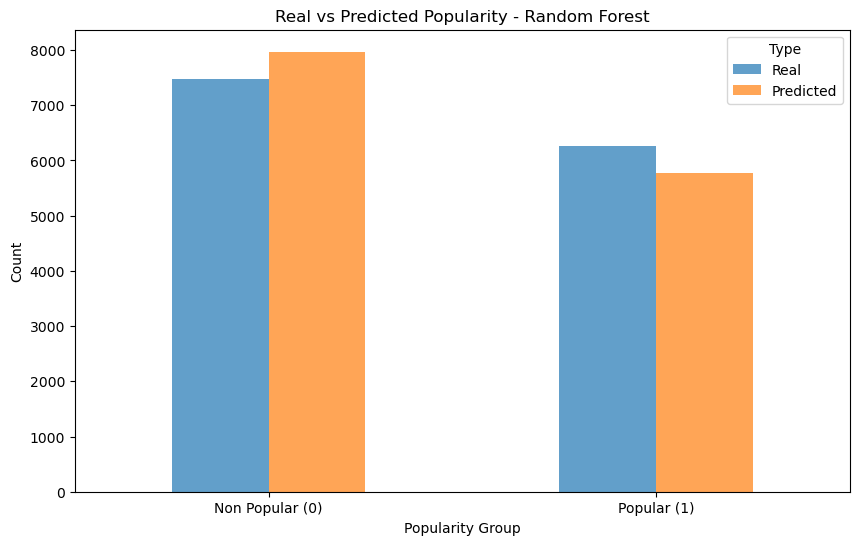

In [21]:
# Preprocessing and Dataset Preparation 
X = spotify.select_dtypes(include='number').drop(columns=['popularity', 'popularity_group_encoded'])
y = spotify['popularity_group_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

#Function for Model Training and Evaluation

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Parameters:
        model: The model to be trained and evaluated (e.g., KNeighborsClassifier or LogisticRegression).
        X_train: Training feature set.
        X_test: Testing feature set.
        y_train: Training labels.
        y_test: Testing labels.

    Returns:
        metrics: A dictionary with the calculated metrics (accuracy, roc_auc, f1, recall).
        y_pred: The predicted labels for the test set.
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred)
    }
    
    return metrics, y_pred


# Dictionary to store all model metrics
model_metrics = {}

# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_metrics, knn_y_pred = train_and_evaluate_model(knn_model, X_train_normalized, X_test_normalized, y_train, y_test)
model_metrics['KNN'] = knn_metrics

# Logistic Regression Classifier
logistic_model = LogisticRegression(max_iter=1000)
logistic_metrics, logistic_y_pred = train_and_evaluate_model(logistic_model, X_train_normalized, X_test_normalized, y_train, y_test)
model_metrics['Logistic Regression'] = logistic_metrics

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_metrics, rf_y_pred = train_and_evaluate_model(rf_model, X_train_normalized, X_test_normalized, y_train, y_test)
model_metrics['Random Forest'] = rf_metrics


# Convert the model metrics dictionary into a DataFrame for easy display
metrics_df = pd.DataFrame(model_metrics).transpose()
metrics_df.columns = ['Accuracy', 'ROC AUC', 'F1 Score', 'Recall']
print(metrics_df)


def plot_real_vs_predicted(y_test, y_pred, model_name):
    # Count occurrences of real and predicted values
    real_counts = y_test.value_counts()
    predicted_counts = pd.Series(y_pred).value_counts()
    data = pd.DataFrame({
        'Real': real_counts,
        'Predicted': predicted_counts
    }).fillna(0)
    data.plot(kind='bar', figsize=(10, 6), alpha=0.7)
    plt.title(f'Real vs Predicted Popularity - {model_name}')
    plt.xlabel('Popularity Group')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['Non Popular (0)', 'Popular (1)'], rotation=0)
    plt.legend(title='Type', loc='upper right')
    plt.show()

# Plot results for all models
plot_real_vs_predicted(y_test, knn_y_pred, 'KNN')
plot_real_vs_predicted(y_test, logistic_y_pred, 'Logistic Regression')
plot_real_vs_predicted(y_test, rf_y_pred, 'Random Forest')


In [22]:
# -----------  Function for Hyperparameter Tuning -----------

def tuning(model, params, X_train, y_train, X_test, y_test, lbl):
    grid = GridSearchCV(model, params, cv=10, scoring='roc_auc', n_jobs=-1, return_train_score=False, verbose=1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print(f"Best estimator for {lbl}: {best_model}")
    print(" ")
    print("Optimized hyperparameters: ", grid.best_params_)
    print(" ")

    predictions = best_model.predict(X_test)

    return grid

#define parameters
rf_params = {
    'n_estimators': [100, 200, 300],      
    'max_depth': [None, 10, 20, 30],    
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4] }        

tuned_rf = tuning(RandomForestClassifier(), rf_params, X_train_normalized, y_train, X_test_normalized, y_test, 'Random Forest')

print("Best parameters founded for RandomForestClassifier:")
print(tuned_rf.best_params_)

best_logistic_model = tuned_rf.best_estimator_
final_predictions = best_logistic_model.predict(X_test_normalized)

final_accuracy = accuracy_score(y_test, final_predictions)
final_roc_auc = roc_auc_score(y_test, final_predictions)
final_f1 = f1_score(y_test, final_predictions)
final_recall = recall_score(y_test, final_predictions)

print("\nResults after tuning:")
print(f"Accuracy: {final_accuracy}")
print(f"ROC AUC: {final_roc_auc}")
print(f"F1 Score: {final_f1}")
print(f"Recall: {final_recall}")


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
original_shape = spotify.shape
print("Dimension original dataset:", original_shape)

train_shape = X_train.shape
print("Dimension train set:", train_shape)

test_shape = X_test.shape
print("Dimension test set:", test_shape)


## --- RECOMMENDATION SYSTEM ---

#### generate music recommendations based on the music audio features

In [25]:
spotify = spotify.reset_index(drop=True)
music_features_scaled = spotify[['danceability', 'energy', 'key', 
                           'loudness', 'mode','acousticness',
                           'liveness', 'valence', 'tempo', 'genre_encoded', 'artists_encoded', 'popularity']].values

In [26]:
# a function to get content-based recommendations based on music features
from sklearn.metrics.pairwise import cosine_similarity
def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in spotify['track_name'].values:
        print(f"'{input_song_name}' not found in the Spotify dataset")
        return

    # Get the index of the input song
    input_song_index = spotify[spotify['track_name'] == input_song_name].index[0]

    # Calculate the similarity scores based on music features (cosine similarity)
    similarity_scores = cosine_similarity([music_features_scaled[input_song_index]], music_features_scaled)

    # Get the indices of the most similar songs
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    content_based_recommendations = spotify.iloc[similar_song_indices][['track_name', 'artists', 'album_name', 'popularity', 'track_genre']]

    return content_based_recommendations

In [30]:
def tracks_for_artists(spotify, nome_artista):
    tracce = spotify[spotify['artists'] == nome_artista]['track_name']
    
    if tracce.empty:
        return f"Artist '{nome_artista}' is not present in the dataset."

    return tracce.tolist()

#nome_artista = 'Elvis Presley'
nome_artista = 'AC/DC'
tracce = tracks_for_artists(spotify, nome_artista)
print(tracce)

['Thunderstruck', 'Highway to Hell', 'Back In Black', 'T.N.T.', 'You Shook Me All Night Long', 'Shoot to Thrill', 'Dirty Deeds Done Dirt Cheap', 'Rock N Roll Train', 'Hells Bells', "It's a Long Way to the Top (If You Wanna Rock 'N' Roll)", 'Moneytalks', 'For Those About to Rock (We Salute You)', 'Shot In The Dark', 'Whole Lotta Rosie', 'Who Made Who', 'Are You Ready', 'War Machine', 'Demon Fire', 'Rock or Bust', 'Let There Be Rock', 'Touch Too Much', 'Girls Got Rhythm', "If You Want Blood (You've Got It)", "Rock and Roll Ain't Noise Pollution", 'Stiff Upper Lip']


In [31]:
input_song_name = "Back In Black"
#input_song_name = "I'm Yours"
#input_song_name ="There's Nothing Holdin' Me Back"

recommendations = content_based_recommendations(input_song_name, num_recommendations=10)

pd.set_option('display.max_colwidth', None) 
pd.set_option('display.width', 1000)

# Display recommendations
print(f"Recommended songs for '{input_song_name}':")
display(recommendations)


Recommended songs for 'Back In Black':


,track_name,artists,album_name,popularity,track_genre
21761,Somebody Out There,A Rocket To The Moon,Wild & Free (Deluxe),58,emo
22317,waiting,916frosty,waiting,45,emo
32290,Let There Be Rock,AC/DC,Let There Be Rock,64,hard-rock
22329,NINI,6ix9ine;Leftside,TattleTales,48,emo
14313,9 Nights,6t6;Big Smoak,9 Nights,35,dancehall
21099,Inside - Jerome Isma-Ae Remix,8Kays;Diana Miro;Jerome Isma-Ae,Inside,50,electronic
25369,96 Tears,? & The Mysterians,Don't Break This Heart Of Mine,40,garage
21559,Smile,A.M.R,Smile,54,electronic
14350,Feel So High,6t6;Big Smoak,Feel So High,34,dancehall
32153,Whole Lotta Rosie,AC/DC,Let There Be Rock,65,hard-rock
